# SIT744 Practical 5: tf.data input pipeline

*Prof. Antonio Robles-Kelly*

<div class="alert alert-info">
We suggest that you run this notebook using Google Colab.
</div>


## Pre-practical readings

- [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data)

## Task 1 Experiments with neural networks

### Task 1.1 Experiments with binary classification

The code for binary classification is copied below for you.

Complete the following experiments:

- You used two representation layers before the final classification layer. Try using one or three representation layers, and see how doing so affects validation and test accuracy.
- Try using layers with more units or fewer units: 32 units, 64 units, and so on.
- Try using the mse loss function instead of binary_crossentropy.
- Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.datasets import imdb



(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [8]:
print(type(train_data))
print(train_data.shape)
idx = 1
print(type(train_data[idx]))
print(len(train_data[idx]))

<class 'numpy.ndarray'>
(25000,)
<class 'list'>
189


In [10]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

print(x_train.shape)

(25000, 10000)


In [12]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))



Epoch 1/20


2024-08-07 22:15:24.846457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6920 - loss: 0.5986 - val_accuracy: 0.8669 - val_loss: 0.3975
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8942 - loss: 0.3409 - val_accuracy: 0.8838 - val_loss: 0.3158
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9252 - loss: 0.2456 - val_accuracy: 0.8867 - val_loss: 0.2893
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9407 - loss: 0.1977 - val_accuracy: 0.8880 - val_loss: 0.2758
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9468 - loss: 0.1641 - val_accuracy: 0.8875 - val_loss: 0.2743
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9586 - loss: 0.1364 - val_accuracy: 0.8840 - val_loss: 0.2876
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9624 - loss: 0.1242 - val_accuracy: 0.8855 - val_loss: 0.2893
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9709 - loss: 0.1041 - val_accuracy: 0.8844 - val_loss: 0.

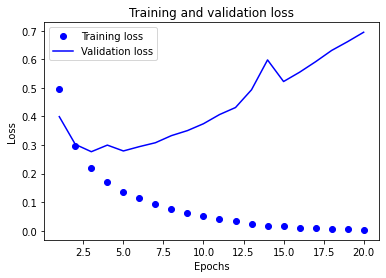

782/782 [==============================] - 2s 3ms/step - loss: 0.7547 - accuracy: 0.8512


[0.7546974420547485, 0.8511999845504761]

In [3]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

results = model.evaluate(x_test, y_test)
results

### Task 2.2 Experiments with multiclass classification

The code for multiclass classification is copied below for you.

Complete the following experiments:
- Try using larger or smaller layers: 32 units, 128 units, and so on.
- You used two intermediate layers before the final softmax classification layer. Now try using a single intermediate layer, or three intermediate layers.


In [4]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)


one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 24ms/step - loss: 2.6581 - accuracy: 0.5182 - val_loss: 1.7676 - val_accuracy: 0.6360
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4347 - accuracy: 0.7066 - val_loss: 1.3121 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0613 - accuracy: 0.7736 - val_loss: 1.1347 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8411 - accuracy: 0.8229 - val_loss: 1.0385 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6757 - accuracy: 0.8515 - val_loss: 0.9754 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5443 - accuracy: 0.8852 - val_loss: 0.9495 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4417 - accuracy: 0.9097 - val_loss: 0.9458 - val_accuracy: 0.7920
Epoch 8/20
16

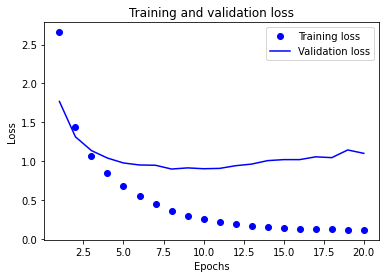

Epoch 1/8
16/16 [==============================] - 1s 28ms/step - loss: 2.6555 - accuracy: 0.5259 - val_loss: 1.7327 - val_accuracy: 0.6450
Epoch 2/8
16/16 [==============================] - 0s 16ms/step - loss: 1.4169 - accuracy: 0.7145 - val_loss: 1.2936 - val_accuracy: 0.7350
Epoch 3/8
16/16 [==============================] - 0s 16ms/step - loss: 1.0483 - accuracy: 0.7772 - val_loss: 1.1172 - val_accuracy: 0.7590
Epoch 4/8
16/16 [==============================] - 0s 16ms/step - loss: 0.8247 - accuracy: 0.8240 - val_loss: 1.0184 - val_accuracy: 0.7810
Epoch 5/8
16/16 [==============================] - 0s 18ms/step - loss: 0.6537 - accuracy: 0.8619 - val_loss: 0.9604 - val_accuracy: 0.8020
Epoch 6/8
16/16 [==============================] - 0s 15ms/step - loss: 0.5230 - accuracy: 0.8924 - val_loss: 0.9649 - val_accuracy: 0.7910
Epoch 7/8
16/16 [==============================] - 0s 16ms/step - loss: 0.4237 - accuracy: 0.9131 - val_loss: 0.9072 - val_accuracy: 0.8090
Epoch 8/8
71/71 [===

[1.0040723085403442, 0.7813891172409058]

In [6]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

## Task 2 TensorFlow input pipelines

If you are familiar with the Scikit-learn [Pipeline](https://scikit-learn.org/stable/modules/compose.html#pipeline), you would appreciate the convenience it brings to data preprocessing. In TensorFlow, the `tf.data` API provides similar functionality. 

1. When you dealing with a huge dataset or a data stream that cannot fit into memory, the `tf.data` API provides a way to feed training data batches into TensorFlow.
2. As we see in the lecture, often data from different raw formats (for example text) need to be preprocessed. The `tf.data` allows this and other transformations to be performed on-the-fly. 

The key abstraction in the `tf.data` API is the `tf.data.Dataset` interface, which consists of a sequence of **elements** and an iterator for the sequence. (If you are not familiar with Iterator, see [here](https://wiki.python.org/moin/Iterator).) Often an element is a pair of batched data *(training features, labels)*. 



### Task 2.1 TensorFlow Datasets: a collection of ready-to-use datasets

If you are looking for some common datasets to test your model, you can find example Datasets in `tensorflow_datasets`. These are similar to the NumPy datasets provided by `tf.keras.datasets`. 

**Warning**: You should not confuse "TensorFlow Datasets" provided by the `tensorflow_datasets` package (aka `tfds`, see below) with the `tf.data.Dataset` API (aka `Dataset`). The former is a collection of ready-to-go datasets packaged using the latter. (Yes I know. Unfortunately, TensorFlow has a lot of confusingly named modules. But you should feel lucky that you do not have to learn TensorFlow v1 anymore.)

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Construct a tf.data.Dataset
ds = tfds.load('mnist', split='train', shuffle_files=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


Every Dataset may have a different data structure for its elements. You can see how each element is organised via `Dataset.element_spec`.

In [8]:
print(ds.element_spec)

{'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}


Dataset is designed to be used for large datasets. Therefore it is not meant to be loaded into the memory all at once. Instead, a Dataset has an iterable interface and you can use a for-loop to progressively access the elements in a Dataset.

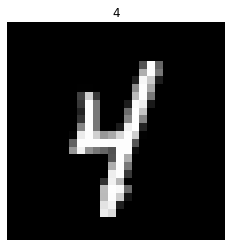

In [9]:
for example in ds.take(1):
  image, label = example["image"], example["label"]


## Show the image and label
import matplotlib.pyplot as plt
import numpy as np

def show(image, label):
  plt.figure()
  plt.imshow(np.squeeze(image), cmap='gray')
  plt.title(label.numpy())
  plt.axis('off')

show(image, label)


In the above example, the function `take(n)` limits the number of elements returned by the iterator to `n`.

**exercise** Find out what other datasets are available from `tensorflow_datasets`.

### Task 2.2 Define a data source

When you want to use your own data, a Dataset can be sourced from either the memory or physical files. 

#### Dataset from the memory

To define a data source in the memory, you use the function `tf.data.Dataset.from_tensor_slices()`. 

In [18]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])

for item in dataset:
    print(item)

tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


2024-08-07 22:25:24.117333: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In most cases, you do not want to use the closely-named function `tf.data.Dataset.from_tensors()`. 

**exercise** Repeat the above experiment replacing `tf.data.Dataset.from_tensor_slices()` with  `tf.data.Dataset.from_tensors()`. What will you get?

#### Dataset from files



##### TextLineDataset

If you have a text file, you can create a Dataset so that each line is an element.

In [27]:
## You can find the file in your Google Colab host machine
file_paths = ["sample_data/california_housing_train.csv"]

housing_dataset = tf.data.TextLineDataset(file_paths)

print(housing_dataset.element_spec)

for line in housing_dataset.take(5):
    print(line.numpy())

TensorSpec(shape=(), dtype=tf.string, name=None)


2024-08-07 22:31:39.009427: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: NOT_FOUND: sample_data/california_housing_train.csv; No such file or directory


NotFoundError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} sample_data/california_housing_train.csv; No such file or directory [Op:IteratorGetNext] name: 



For a CSV file, each line still needs to be parsed. You can follow the code snippet below for that.

In [12]:
for line in housing_dataset.skip(1).take(5):
  column_default_values = [[]] * 9
  columns = tf.io.decode_csv(line, record_defaults = column_default_values)
  print(tf.stack(columns).numpy())

[-1.1431e+02  3.4190e+01  1.5000e+01  5.6120e+03  1.2830e+03  1.0150e+03
  4.7200e+02  1.4936e+00  6.6900e+04]
[-1.1447e+02  3.4400e+01  1.9000e+01  7.6500e+03  1.9010e+03  1.1290e+03
  4.6300e+02  1.8200e+00  8.0100e+04]
[-1.1456e+02  3.3690e+01  1.7000e+01  7.2000e+02  1.7400e+02  3.3300e+02
  1.1700e+02  1.6509e+00  8.5700e+04]
[-1.1457e+02  3.3640e+01  1.4000e+01  1.5010e+03  3.3700e+02  5.1500e+02
  2.2600e+02  3.1917e+00  7.3400e+04]
[-1.1457e+02  3.3570e+01  2.0000e+01  1.4540e+03  3.2600e+02  6.2400e+02
  2.6200e+02  1.9250e+00  6.5500e+04]


##### make_csv_dataset

Alternatively you can use the function `tf.data.experimental.make_csv_dataset` to read CSV files.

In [13]:
housing_batches = tf.data.experimental.make_csv_dataset(
    file_paths, batch_size=4,
    label_name="median_house_value")

print(housing_batches.element_spec)

housing_batches.element_spec[0]

(OrderedDict([('longitude', TensorSpec(shape=(4,), dtype=tf.float32, name=None)), ('latitude', TensorSpec(shape=(4,), dtype=tf.float32, name=None)), ('housing_median_age', TensorSpec(shape=(4,), dtype=tf.float32, name=None)), ('total_rooms', TensorSpec(shape=(4,), dtype=tf.float32, name=None)), ('total_bedrooms', TensorSpec(shape=(4,), dtype=tf.float32, name=None)), ('population', TensorSpec(shape=(4,), dtype=tf.float32, name=None)), ('households', TensorSpec(shape=(4,), dtype=tf.float32, name=None)), ('median_income', TensorSpec(shape=(4,), dtype=tf.float32, name=None))]), TensorSpec(shape=(4,), dtype=tf.float32, name=None))


OrderedDict([('longitude',
              TensorSpec(shape=(4,), dtype=tf.float32, name=None)),
             ('latitude', TensorSpec(shape=(4,), dtype=tf.float32, name=None)),
             ('housing_median_age',
              TensorSpec(shape=(4,), dtype=tf.float32, name=None)),
             ('total_rooms',
              TensorSpec(shape=(4,), dtype=tf.float32, name=None)),
             ('total_bedrooms',
              TensorSpec(shape=(4,), dtype=tf.float32, name=None)),
             ('population',
              TensorSpec(shape=(4,), dtype=tf.float32, name=None)),
             ('households',
              TensorSpec(shape=(4,), dtype=tf.float32, name=None)),
             ('median_income',
              TensorSpec(shape=(4,), dtype=tf.float32, name=None))])

In [14]:
for features, labels in housing_batches.take(1):
  print(f"median_price: {labels}")
  for key, value in features.items():
      print(f"{key}: {value}")

median_price: [ 84000. 114100. 145800. 105600.]
longitude: [-116.43 -118.28 -118.17 -118.22]
latitude: [34.1  34.   33.91 33.9 ]
housing_median_age: [17. 46. 42. 35.]
total_rooms: [6683. 1650.  856. 1649.]
total_bedrooms: [1296.  463.  167.  424.]
population: [2677. 1992.  748. 1786.]
households: [1227.  458.  195.  388.]
median_income: [2.4828 2.3403 3.8    1.4091]


Below is another example.

In [15]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)

titanic_batches = tf.data.experimental.make_csv_dataset(
    train_file_path, batch_size=4,
    label_name="survived")

print(titanic_batches.element_spec)

print()
print("Features:")
titanic_batches.element_spec[0]

32768/30874 [===============================] - 0s 0us/step
(OrderedDict([('sex', TensorSpec(shape=(4,), dtype=tf.string, name=None)), ('age', TensorSpec(shape=(4,), dtype=tf.float32, name=None)), ('n_siblings_spouses', TensorSpec(shape=(4,), dtype=tf.int32, name=None)), ('parch', TensorSpec(shape=(4,), dtype=tf.int32, name=None)), ('fare', TensorSpec(shape=(4,), dtype=tf.float32, name=None)), ('class', TensorSpec(shape=(4,), dtype=tf.string, name=None)), ('deck', TensorSpec(shape=(4,), dtype=tf.string, name=None)), ('embark_town', TensorSpec(shape=(4,), dtype=tf.string, name=None)), ('alone', TensorSpec(shape=(4,), dtype=tf.string, name=None))]), TensorSpec(shape=(4,), dtype=tf.int32, name=None))

Features:


OrderedDict([('sex', TensorSpec(shape=(4,), dtype=tf.string, name=None)),
             ('age', TensorSpec(shape=(4,), dtype=tf.float32, name=None)),
             ('n_siblings_spouses',
              TensorSpec(shape=(4,), dtype=tf.int32, name=None)),
             ('parch', TensorSpec(shape=(4,), dtype=tf.int32, name=None)),
             ('fare', TensorSpec(shape=(4,), dtype=tf.float32, name=None)),
             ('class', TensorSpec(shape=(4,), dtype=tf.string, name=None)),
             ('deck', TensorSpec(shape=(4,), dtype=tf.string, name=None)),
             ('embark_town',
              TensorSpec(shape=(4,), dtype=tf.string, name=None)),
             ('alone', TensorSpec(shape=(4,), dtype=tf.string, name=None))])

You can use `take(n)` to get the first n elements from a Dataset.

In [16]:
for features, labels in titanic_batches.take(1):
  print(f"survived: {labels}")
  for key, value in features.items():
      print(f"{key}: {value}")

survived: [0 1 1 1]
sex: [b'male' b'male' b'female' b'male']
age: [21. 49. 28. 27.]
n_siblings_spouses: [0 1 2 0]
parch: [0 0 0 0]
fare: [ 7.775  89.1042 23.25   30.5   ]
class: [b'Third' b'First' b'Third' b'First']
deck: [b'unknown' b'C' b'unknown' b'unknown']
embark_town: [b'Southampton' b'Cherbourg' b'Queenstown' b'Southampton']
alone: [b'y' b'n' b'n' b'y']


Later on, the features should be processed into numerical tensors. In particular, categorical features should be encoded by either one-hot vectors or more sophisticated embeddings, which we will learn later.

##### TFRecord

Besides CSV files, TensorFlow actually recommends the binary TFRecord files for your data. You have encountered this file format in Practical 2, when we learned TensorBoard. The event files generated by `tf.summary` are just TFRecord files. A TFRecord file contains a sequence of `tf.train.Example`. You can use `tf.data.TFRecordDataset` to construct a Dataset from one or more TFRecord files. As it is more complex, we will not go into the details in this practical.


In [17]:
DATA_URL = "https://storage.googleapis.com/download.tensorflow.org/data/fsns-20160927/testdata/fsns-00000-of-00001"
fsns_test_file = tf.keras.utils.get_file("fsns.tfrec", DATA_URL )
dataset = tf.data.TFRecordDataset(filenames = [fsns_test_file])

print(dataset.element_spec)

7905280/7904079 [==============================] - 0s 0us/step
TensorSpec(shape=(), dtype=tf.string, name=None)


Here `Dataset.element_spec` is not of much use as each element is stored as a byte string. To access the features, follow the example below. As you can see, the data itself is deeply embedded in a nested data structure. This is for reversing space for future extensions of the API.

In [18]:
for element in dataset.take(1):
  example = tf.train.Example.FromString(element.numpy())

print(dict(example.features.feature).keys())

dict_keys(['image/format', 'image/text', 'image/unpadded_class', 'image/width', 'image/height', 'image/class', 'image/orig_width', 'image/encoded'])


### Task 2.3 Batching

Batching can be achieved through the `batch()` function.

In [19]:
print("Individual element")
for element in housing_dataset.skip(1).take(8): #Skipping the CSV heading
  print(element)

print()
print("Three batches")
for batches in housing_dataset.skip(1).take(8).batch(3):
  print(batches)

Individual element
tf.Tensor(b'-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000', shape=(), dtype=string)
tf.Tensor(b'-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000', shape=(), dtype=string)
tf.Tensor(b'-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000', shape=(), dtype=string)
tf.Tensor(b'-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000', shape=(), dtype=string)
tf.Tensor(b'-114.570000,33.570000,20.000000,1454.000000,326.000000,624.000000,262.000000,1.925000,65500.000000', shape=(), dtype=string)
tf.Tensor(b'-114.580000,33.630000,29.000000,1387.000000,236.000000,671.000000,239.000000,3.343800,74000.000000', shape=(), dtype=string)
tf.Tensor(b'-114.580000,33.610000,25.000000,2907.000000,680.000000,1841.000000,633.000000,2.676800,82400.000000', shape=(), dtype=string)
tf.Tensor(b'-114.5

**question** What is the size of the last batch?

**exercise** Read the tf.Dataset documentation to find out how to do repeat and shuffle training data. Then apply them to the housing dataset.

### Task 2.4 Dataset transformation 

Data preprocessing can be achieved by chaining transformations over the original Dataset. The main function for element-wise transforms is `Dataset.map()`, which is similar to the `map()` function built in other programming languages (such as [Python](https://docs.python.org/3/library/functions.html#map) or [R](https://purrr.tidyverse.org/reference/map.html)).

Below is the MNIST example we saw earlier.

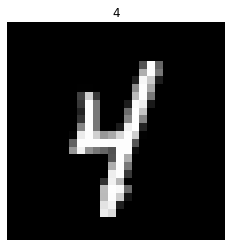

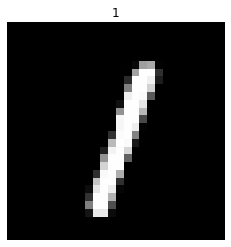

In [20]:
for example in ds.take(2):
  image, label = example["image"], example["label"]
  show(image, label)

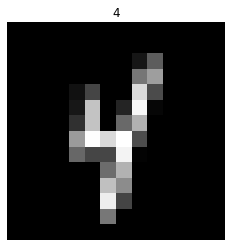

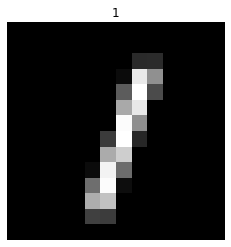

In [21]:
def resize_image(example):
  image, label = example["image"], example["label"]
  image = tf.image.resize(image, [14, 14])
  return image, label 
                     

resized_ds = ds.map(resize_image)


for image, label in resized_ds.take(2):
  show(image, label)

**exercise** Use the map function to scale the image pixels to have values between 0 and 1.

## Additional resources

- [A blog article on TensorFlow Data Pipeline](https://heartbeat.fritz.ai/building-a-data-pipeline-with-tensorflow-3047656b5095)